# Learning Regression with Regularization and Cross Validation
Regularized Linear Regression using Gradient Descent Algorithm

Read more at

https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

<h3> Gradient Descent Algorithm with Regularization </h3>
<p>
We start with assumpution equation (Called hypothesis) which can fit above data points.   
<p>
$h(x) = w_0 + w_1 x$
</p> 
The two coefficients with initial guess (i.e. $w_0$ and $w_1$) of $h(x)$ will be fed into the algorithm.
Then Program will start from initial guess and then iterate steps to find the best fit.

<p>
 Our objective is to minimize Loss.
    <p>
 $ L(W)=   \hat{Y}-Y$  Where  $\hat{Y}=h(X)$
 </p>
Since Loss can negative or postive, we need to minimize the absolute values ( OR Mean squared) Loss so we define Loss/Cost function as follows

<h3>Cost/Loss Function with Regularization</h3>
We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's and the actual output y's.

$L(W) = \dfrac {1}{2n} \displaystyle \sum _{i=1}^n \left ( \hat{Y}_{i}- Y_{i} \right)^2+\frac{1}{n} \frac{\lambda}{2} \sum_{j} w_{j}^{2}$
<p>
$L(w_0, w_1)  = \dfrac {1}{2n} \displaystyle \sum _{i=1}^n \left (h(x_{i}) - y_{i} \right)^2 +\frac{1}{n} \frac{\lambda}{2}  \sum_{j} w_{j}^{2}$ 

This Loss/cost function is also called the "Squared error function", or "Mean squared error". The mean is halved $\left(\frac{1}{2}\right)$as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$  term.

We minimize Loss by taking the derivative (the tangential line to a function) of our cost/loss function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost/loss function in the direction with the steepest descent. The size of each step is determined by the parameter α($alpha$), which is called the learning rate. The direction in which the step is taken is determined by the partial derivative of $L(w_0,w_1)$. 

The gradient descent algorithm is:

repeat until convergence:<p>
{<p>
&nbsp;&nbsp;    $w_0 := w_0 - \alpha \frac{\partial}{\partial w_0} L(w_0, w_1) + \frac{\lambda}{n} \sum_{j} w_{j}$<p>
&nbsp;&nbsp;    $w_1 := w_1 - \alpha \frac{\partial}{\partial w_1} L(w_0, w_1) + \frac{\lambda}{n} \sum_{j} w_{j}$<p>
}

OR<p>
$\begin{align*} \text{repeat until convergence: } \lbrace & \newline w_0 := & w_0 - \alpha \frac{1}{n} \sum\limits_{i=1}^{n}(h_w(x_{i}) - y_{i}) + \frac{\lambda}{n} \sum_{j} w_{j}\newline w_1 := & w_1 - \alpha \frac{1}{n} \sum\limits_{i=1}^{n}\left((h_w(x_{i}) - y_{i}) x_{i}\right) + \frac{\lambda}{n} \sum_{j} w_{j}\newline \rbrace& \end{align*}$

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


## Data

In [37]:
X=np.array([[-15.94,-29.15,36.19,7.49,-48.06,-8.94,15.31,
             -34.71,1.39]]).T
Y=np.array([[2.13,1.17,12.36,6.84,2.81,6.12,14.71,
             2.61,3.74]]).T


# Helper Functions

In [38]:
from sklearn.preprocessing import PolynomialFeatures

def mapFeature(X,degree):
    out= PolynomialFeatures(degree=degree).fit_transform(X)
    return out

In [39]:
from sklearn.preprocessing import StandardScaler

def featureNormalize(X):
    scaler=StandardScaler().fit(X)
    X_norm = scaler.transform(X)
    return X_norm, scaler

In [40]:
def computeCost(weights,X,Y,regLambda):
    n = X.shape[0]
    weights.shape = (X.shape[1],1)

    Yhat=np.matmul( X,weights)                      #Hypothesis
    err=Yhat-Y
    errSqr=err**2
    J=(1.0/(2.0*n))* np.sum(errSqr)
    
    
    regularized_weights=np.concatenate((np.zeros((1,1)) , weights[1:,:]),axis=0)
    J=J +regLambda* (1.0/(2.0*n)) *(np.sum(regularized_weights**2))
 
    
    return J


In [41]:


def gradientDescent(X, Y, weights, alpha, iterations,degree,regLambda):        
    n=len(Y)
    I=np.zeros((iterations,1),dtype=float)
    J=np.zeros((iterations,1),dtype=float)
    for k in range(iterations):
        
        Yhat=np.matmul( X,weights)                      #Hypothesis
        err=Yhat-Y
        d=np.matmul(err.T,X)  
        g=  alpha*((1.0/n)*d)              #Derivative
        g=g.T     #Itrations  
        regularized_weights=np.concatenate((np.zeros((1,1)) , weights[1:,:]),axis=0)
        g=g+ (regLambda/n)*regularized_weights 
        I[k]=k*1.0
        J[k]=computeCost(weights,X,Y,regLambda)
        weights=weights-g
    
    
    
    #plt.plot(I, J,color='r')
    return weights


In [42]:
def predict(weights,X,scaler,degree):
    XS=scaler.transform(X)
    pX=mapFeature(XS,degree)
    Py=np.matmul(pX, weights)
    return Py

# Plotting With Different Regularization Parameters and degree

In [61]:
def plotHypothesis(weights,X,Y,regLambda,scaler,degree):
    plt.scatter(X,Y) 
    plt.title("Lambda="+str(regLambda)+",Degree="+str(degree))
    x_min, x_max = X[:, 0].min()-20 , X[:, 0].max()+20 
    u = np.linspace(x_min, x_max, 100)
    u.shape=(len(u),1) 
    v=predict(weights,u,scaler,degree) 
    plt.plot(u, v,color='r')

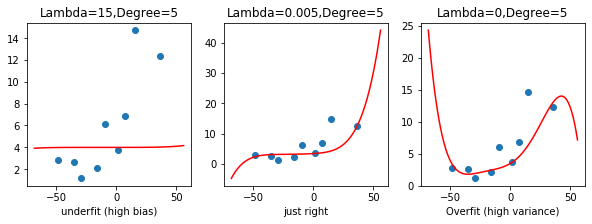

In [79]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,3))
regLambdaList=[15,.005,0]
degreeList=[5,5,5]
for i in range(len(regLambdaList)):
    regLambda=regLambdaList[i]
    degree=degreeList[i]
   
    Xn, scaler = featureNormalize(X)  # Normalize
    Xp=mapFeature(Xn,degree)    #Polynomial
    
    weights=np.random.rand(Xp.shape[1], 1)
    alpha=0.0001
    iter=10000
    #Without Lib   
    weights = gradientDescent(Xp, Y, weights,alpha,iter,degree,regLambda)
    plt.subplot(1 , 3, i+1)
        #plt.axis('equal')
    plotHypothesis(weights,X,Y,regLambda,scaler,degree)
    plt.xlabel("Overfit (high variance)" if i==2 else "just right" if i==1 else "underfit (high bias)" )

plt.show()